# Advanced Altair: Multiple Coordinated Views

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import altair as alt
import pandas as pd
import numpy as np

In [2]:
flu = pd.read_csv('flunet2010_11countries.csv', header=[0,1])
cols = flu.columns.tolist()
normed = pd.melt(flu, id_vars=[cols[0]], value_vars=cols[1:], var_name=['continent','country'])
normed = normed.rename(columns={normed.columns[0]: 'week'})
normed.head()
flu.head()

,week,continent,country,value
0,1,Asia,Afghanistan,5.0
1,2,Asia,Afghanistan,13.0
2,3,Asia,Afghanistan,4.0
3,4,Asia,Afghanistan,0.0
4,5,Asia,Afghanistan,0.0


Unnamed: 0_level_0        Asia South America Australia North America  Asia  \
                week Afghanistan     Argentina Australia        Canada China   
0                  1         5.0             4         2            41  2179   
1                  2        13.0            21         1            15  2213   
2                  3         4.0             6         1             8  2228   
3                  4         0.0             1         0            14  2027   
4                  5         0.0             4         1            12  1813   

  South America Africa  Europe               Africa North America  
       Colombia  Egypt Germany Ireland South Africa           USA  
0            36    739    26.0      23            0           366  
1            36    396    24.0       8            1           396  
2            14    192    18.0       4            0           447  
3            11     80     NaN       8            0           402  
4             8     56     NaN       4            0           404

In [3]:
# setup renderer for Jupyter Notebooks (not needed for Juptyer Lab)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Visualization 1

#### Create Linked Plots Showing Flu Cases per Country and Total Flu Cases per Week

#### Selections:
* Click to select individual countries.
* Hold shift and click to select multiple countries.
* Brush barchart to narrow top view.

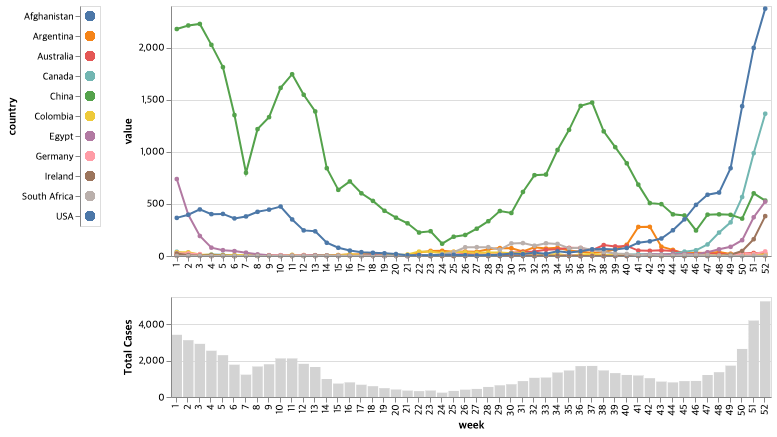

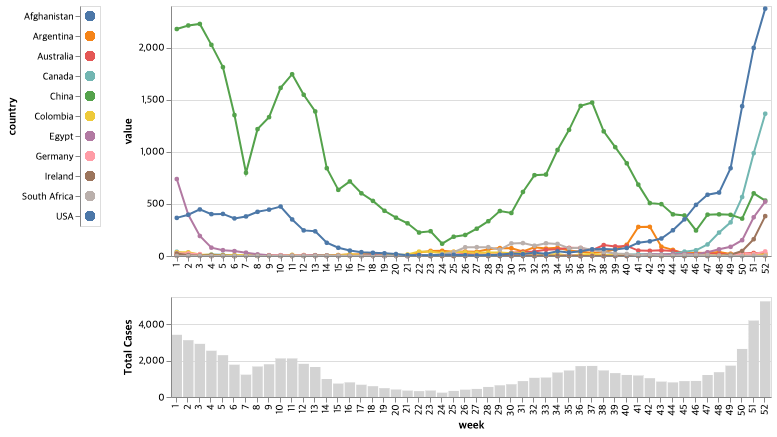

In [16]:
brush = alt.selection_interval(encodings=['x'])
selector = alt.selection_multi(encodings=['color'])
color = alt.condition(selector,
                      alt.Color('country:N', legend=None),
                      alt.value('lightgray'))

line = alt.Chart(normed).mark_line(point=alt.MarkConfig(shape='circle',size = 20)).encode(
    alt.X('week:N', title=None),
    alt.Y('value'),
    color=color,
    tooltip=['week','value']
).properties(
    width=600,
    height=250,
    selection=selector
).transform_filter(
    brush
).transform_filter(
    selector
)

bar = alt.Chart(normed).mark_bar().encode(
    alt.X('week:N'),
    alt.Y('sum(value):Q', title = "Total Cases"),
    color=alt.value('lightgray')
).properties(
    width=600,
    height=100
).add_selection(brush)

col = alt.Chart(normed).mark_circle(size=100).encode(
    alt.Y('country'),
    color=color
).add_selection(
    selector
)

col|(line & bar) ## concatenate

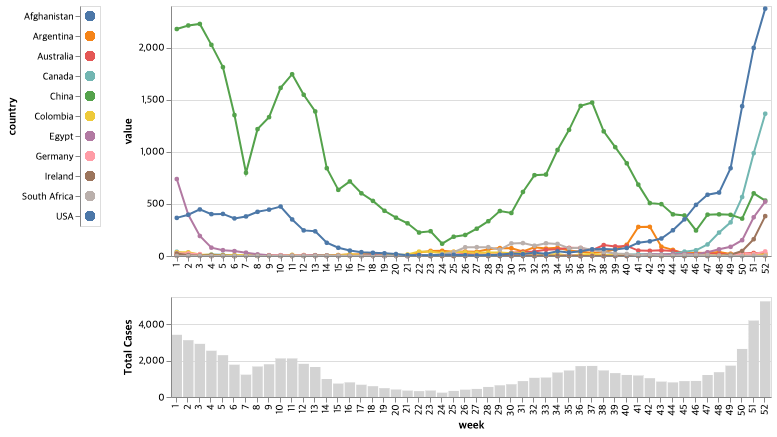

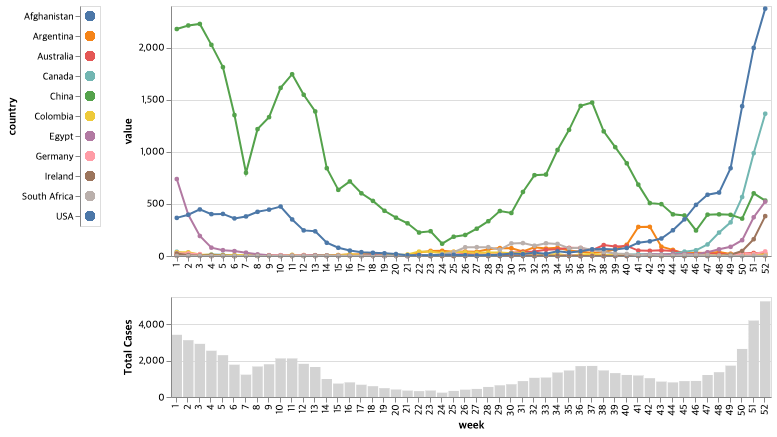

In [18]:
brush = alt.selection_interval(encodings=['x'])
selector = alt.selection_multi(encodings=['color'])
color = alt.condition(selector,
                      alt.Color('country:N', legend=None),
                      alt.value('lightgray'))

line = alt.Chart(normed).mark_line(point=alt.MarkConfig(shape='circle',size = 20)).encode(
    alt.X('week:N', title=None),
    alt.Y('value'),
    color=color,
    tooltip=['country','week','value']
).properties(
    width=600,
    height=250,
    selection=selector
).transform_filter(
    brush
)

bar = alt.Chart(normed).mark_bar().encode(
    alt.X('week:N'),
    alt.Y('sum(value):Q', title = "Total Cases"),
    color=alt.value('lightgray')
).properties(
    width=600,
    height=100
).add_selection(brush)

col = alt.Chart(normed).mark_circle(size=100).encode(
    alt.Y('country'),
    color=color
).add_selection(
    selector
)

col|(line & bar) ## concatenate

In [81]:
normed

,week,continent,country,value
0,1,Asia,Afghanistan,5.0
1,2,Asia,Afghanistan,13.0
2,3,Asia,Afghanistan,4.0
3,4,Asia,Afghanistan,0.0
4,5,Asia,Afghanistan,0.0
5,6,Asia,Afghanistan,0.0
6,7,Asia,Afghanistan,1.0
7,8,Asia,Afghanistan,1.0
8,9,Asia,Afghanistan,NaN
9,10,Asia,Afghanistan,1.0


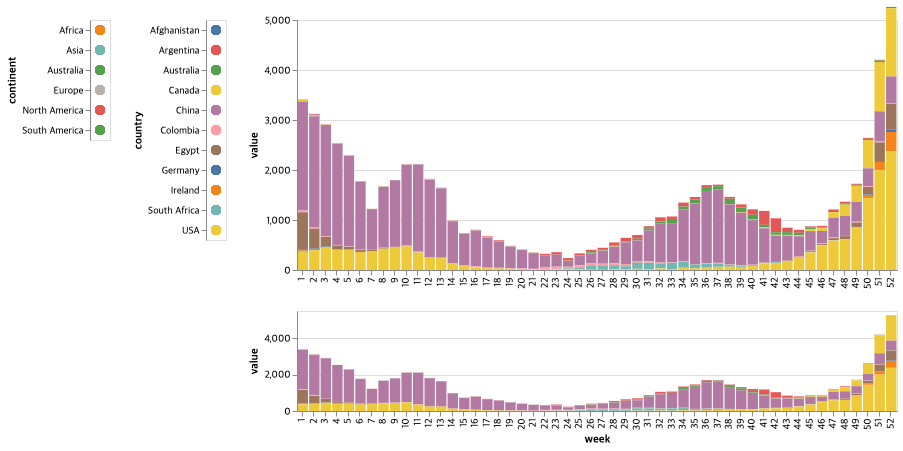

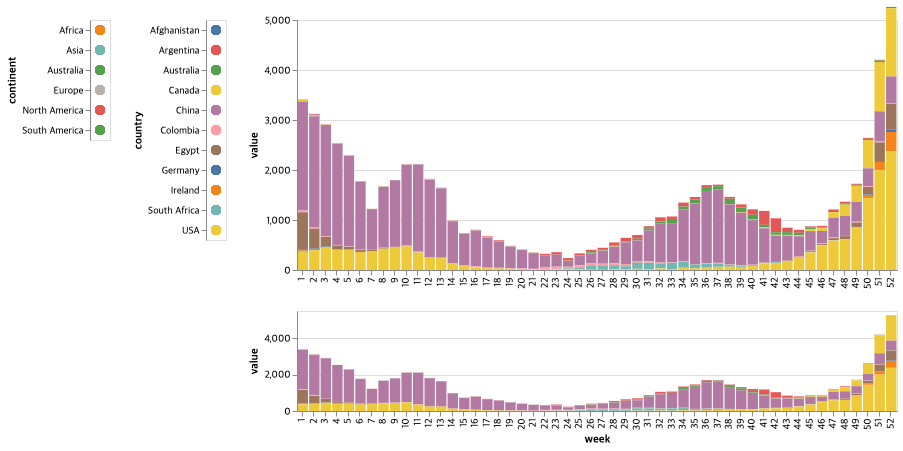

In [91]:
brush = alt.selection_interval(encodings=['x'])
selector = alt.selection_multi(encodings=['color'])

color = alt.condition(selector,
                      alt.Color('country:N', legend=None),
                      alt.value('lightgray'))
color1 = alt.condition(selector,
                      alt.Color('continent:N', legend=None),
                      alt.value('lightgray'))

bar = alt.Chart(normed).mark_bar().encode(
    alt.X('week:N', title=None),
    alt.Y('value',scale=alt.Scale(domain=[0,5000])),
    color=color,
    tooltip=['country','week','value']
).properties(
    width=600,
    height=250,
    selection=selector
).transform_filter(
    brush
).transform_filter(
    selector
)

bar_overview = alt.Chart(normed).mark_bar().encode(
    alt.X('week:N'),
    alt.Y('value:Q'),
    color=alt.Color('country:N', legend = None)
).properties(
    width=600,
    height=100
).add_selection(brush)

col = alt.Chart(normed).mark_circle(size=100).encode(
).add_selection(
    selector
)

col.encode(y="continent",color = color1)|col.encode(y="country", color=color)|(bar & bar_overview) ## concatenate

Concatenate of graph in Altair: [https://altair-viz.github.io/user_guide/compound_charts.html](https://altair-viz.github.io/user_guide/compound_charts.html)

## Visualization 2

#### Create an Overview+Detail Plot Showing Flu Cases per Country

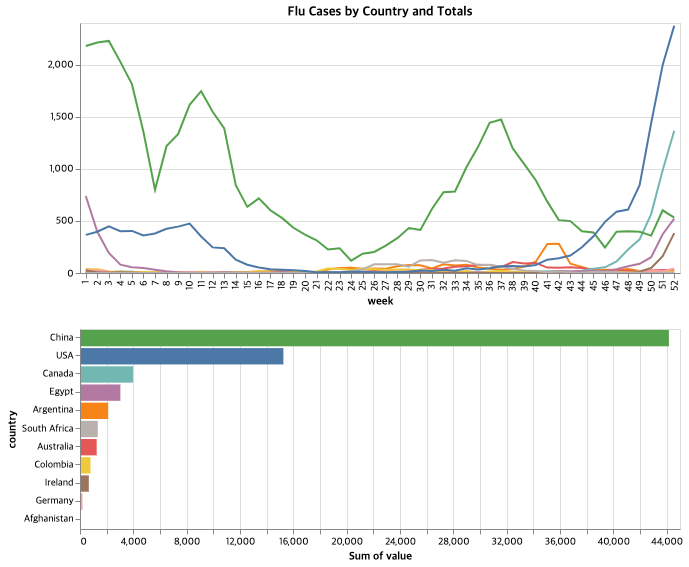

In [41]:
selector = alt.selection_multi(encodings=['color'])

line = alt.Chart(normed).mark_line().encode(
    alt.X('week:N'),
    alt.Y('value', title = None),
    alt.Color('country', legend = None),
    tooltip=['country','week','value']
).properties(
    width=600,
    height=250,
    title='Flu Cases by Country and Totals',
    selection=selector
).transform_filter(selector)

bars = alt.Chart(normed).mark_bar().encode(
    x = alt.X('sum(value):Q'),
    y = alt.Y('country:N',
            sort = alt.EncodingSortField(
            field = "value",  # The field to use for the sort
            op = "sum",  # The operation to run on the field prior to sorting
            order = "descending"  # The order to sort in
        )),
    color = alt.Color('country', legend = None),
    tooltip = ["country", {"aggregate": "sum", "field": "value", "type": "quantitative"}]
).properties(
    width=600,
    height=200
).add_selection(selector)

line&bars

## Visualization 3
#### Create Linked Plots Showing Flu Cases per Country per Week and Total Flu Cases per Country
For this visualization we create two linked plots. One that shows flu cases per country per week and a second on that show the total of all flu cases per country.

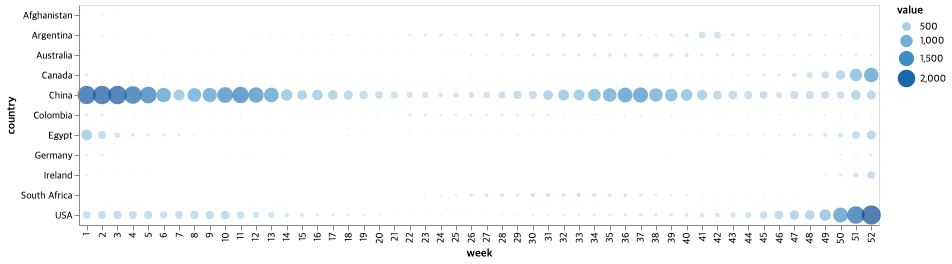

In [62]:
alt.Chart(normed).mark_circle().encode(
    alt.X('week:N'),
    alt.Y('country:N'),
    color = alt.Color('value:Q'),
    size='value:Q'
).properties(
    width = 800
)


#### HTML에 embed 할 수 있다. 